In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [3]:
public_df.shape

(7426, 59)

In [4]:
public_df.columns

Index(['row_id', 'user_id', 'record_id', 'recordReceived_ISO8601',
       'recordReceived_secondsSinceMidnight1Jan1970UTC', 'surveyNumber',
       'timestamp', 'startTime', 'associatedAlert', 'responseLagSeconds',
       'dailyAlertNumber', 'spendingDay', 'spendingDayOther', 'sleptFor',
       'tiredness', 'connectedColleagues', 'connectedPatients',
       'feelingEmotion', 'generalEmotion', 'specificEmotion', 'otherEmotion',
       'intensity', 'trigger', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 'emotionResponse',
       'emotionDuration', 'emotionResponseHel

In [5]:
public_df['trigger'][0]

'Returned from exercising at the climbing gym. I solved a bouldering problem I have been working on. I got grocery shopping done and also spent the day at planned parenthood. I feel as if there are many things that got accomplished today'

In [6]:
pd.set_option('display.max_columns', 999)

In [7]:
public_df.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
0,409266,ccc54e93-ba0c-4b5f-8d7a-b065a12b4289.48809b947...,48822288b1f.b804e245-d906-4ffe-b5d0-0a1b398eebf2,2016-10-16T15:34:28.027Z,1476632068,0,1476580462,2016-10-15T18:14:22.402-0700,4882202063c.0376d98d-8114-4c1d-8da3-40424cfb91bc,2044.0,2.0,other,Planned parenthood,7.0,0.5,moderately,highly,yes,enjoyment,peaceful,NaN,0.50,Returned from exercising at the climbing gym. ...,wellbeing,exercise,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,enjoyment,60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,409245,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f01ae909.bbab99de-cd4e-4cf3-a9cf-ddc7fdb3e1d4,2016-10-16T15:28:04.277Z,1476631684,1,1476496584,2016-10-14T18:56:24.572-0700,487f0034ecd.ee8ce6d4-b763-47df-b812-53e6b394edf0,7642.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,fear,anxious,NaN,0.25,Workday,workStress,workload,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,action,60+,helpful,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,409247,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f73adefa.f811e180-d1fb-4341-9840-8d2fb39a428b,2016-10-16T15:28:06.452Z,1476631686,2,1476508583,2016-10-14T22:16:23.450-0700,487f72a2f81.5781fea8-2376-4448-9906-c5072b70f11c,1330.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,anger,frustrated,NaN,0.25,"Relationship, work",socialStress,soChallenge,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,withdrawal,30,neutral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,409313,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,487bdc11f96.c499fc4c-72c6-45e6-bfaa-abbe51984073,2016-10-16T16:03:42.195Z,1476633822,1,1476412108,2016-10-13T19:28:28.913-0700,487bda9559a.9bf80edb-8652-4b87-8be2-0c23ccff0e06,73.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.50,Hanging out with my family and just coming hom...,socialSupport,timeFamily,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,enjoyment,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,409322,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,4881ddddc1d.f3159f84-280b-41a7-bee5-1913b2d6a45e,2016-10-16T16:04:05.588Z,1476633845,6,1476573377,2016-10-15T16:16:17.068-0700,4881dc8e36c.f2d82775-f342-4d53-bec4-dab38817d33e,56.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.50,I actually talked to a faculty member instead ...,wellbeing,play,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,observation,30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [10]:
# number of users
public_df['user_id'].nunique()

347

In [52]:
public_df[(public_df.T == '3d01d422-9602-4d46-8981-70d8768d4df0.4c6a1b9b524.fe387e47-e103-41db-8d8d-37b796402356.635e6883').all()]

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence


In [44]:
public_df['recordReceived_ISO8601'].nunique()

7426

In [ ]:
pd.to_datetime()

In [46]:
public_df['associatedAlert'].nunique()

6693

In [13]:
# max entries by one user
public_df.groupby(['user_id'])['timestamp'].nunique().max()

75

In [15]:
# avg entries per user
public_df.groupby(['user_id'])['timestamp'].nunique().mean()

21.40057636887608

In [16]:
public_df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,7426.0,7.965546e+05,1.587468e+05,4.091990e+05,8.462625e+05,8.599480e+05,8.788732e+05,9.668640e+05
recordReceived_secondsSinceMidnight1Jan1970UTC,7426.0,1.499665e+09,1.001082e+07,1.476630e+09,1.503368e+09,1.503937e+09,1.504671e+09,1.518864e+09
surveyNumber,7426.0,1.512025e+01,1.220783e+01,0.000000e+00,5.000000e+00,1.300000e+01,2.200000e+01,7.400000e+01
timestamp,7426.0,1.499659e+09,1.001227e+07,1.476395e+09,1.503367e+09,1.503931e+09,1.504668e+09,1.518863e+09
responseLagSeconds,6696.0,7.101035e+03,1.449675e+05,-2.067095e+06,4.000000e+01,1.179000e+03,5.277250e+03,9.202608e+06
dailyAlertNumber,6696.0,2.081392e+00,1.025634e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
sleptFor,755.0,7.173510e+00,1.441278e+00,0.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01
tiredness,6388.0,4.654039e-01,2.502869e-01,0.000000e+00,2.500000e-01,5.000000e-01,7.500000e-01,1.000000e+00
intensity,7426.0,5.346081e-01,2.201869e-01,0.000000e+00,5.000000e-01,5.000000e-01,7.500000e-01,1.000000e+00
bodySensationIntensity,7426.0,3.713978e-01,3.064810e-01,0.000000e+00,0.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00


In [17]:
public_df['trigger'][3]

'Hanging out with my family and just coming home and hanging out'

In [18]:
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 59 columns):
row_id                                            7426 non-null int64
user_id                                           7426 non-null object
record_id                                         7426 non-null object
recordReceived_ISO8601                            7426 non-null object
recordReceived_secondsSinceMidnight1Jan1970UTC    7426 non-null int64
surveyNumber                                      7426 non-null int64
timestamp                                         7426 non-null int64
startTime                                         7426 non-null object
associatedAlert                                   6696 non-null object
responseLagSeconds                                6696 non-null float64
dailyAlertNumber                                  6696 non-null float64
spendingDay                                       755 non-null object
spendingDayOther                            

In [19]:
pre_survey = pd.read_csv('data/public-study/EmoTrak PreAssessment_November CLEAN 2017_11.14.csv')

In [20]:
pre_survey.shape

(532, 124)

In [27]:
pd.options.display.max_colwidth = 900
pre_survey.head()
# Q79 and onwards -- questions about sleep, mindfulness ability, meditation practice, feelings of burnout, etc... need to
# transform these and merge with other daily monitoring... 

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q55,Q5_1,Q56,Q6,Q6_16_TEXT,Q6_22_TEXT,Q6_24_TEXT,Q7,Q7_4_TEXT,Q8,Unnamed: 28,Unnamed: 29,Q51,Q9,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q53,Q54,Q79_1,Q79_2,Q79_3,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q48,Q49,Q50,Q51.1,Q26_20,Q26_21,Q26_22,Q26_23,Q26_1,Q26_2,Q26_3,Q26_14,Q26_15,Q26_16,Q26_17,Q26_18,Q26_19,Q27_1,Q27_2,Q27_3,Q27_4,Q27_23,Q27_5,Q27_6,Q27_7,Q27_8,Q24_5,Q24_6,Q24_8,Q24_9,Q24_11,Q24_12,Q24_13,Q24_14,Q24_3,Q24_2,Q25_1,Q25_2,Q25_9,Q25_5,Q25_4,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,Q53_6,Q53_7,Q53_8,Q53_9,Q53_10,Q53_11,Q53_12,Q53_13,Q53_14,Q53_15,Q53_16,Q53_17,Q53_18,Q53_19,Q53_20,Q53_21,Q19_2 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Voluntary\rNature of Research Participation\r\rParticipation\rin research is voluntary.,"Please create your unique ID here.\r\r\tThis is the first and last letter of your Mother's first name ( If Mary, M,Y)\r\t The last letter of your first name (if your name is Paul -L)\r\tThe first letter of the month of your birth and the date of your birth ( If February 12th, - F12)\r\tFinally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277",How old are you? - Age,Repeat the ID here,Choose which categories best fit your background. - Selected Choice,Choose which categories best fit your background. - Other Asian - Text,Choose which categories best fit your background. - Other Pacific Islander - Text,Choose which categories best fit your background. - Other - Text,How do you identify your gender? - Selected Choice,How do you identify your gender? - Fill in - Text,Please select the category that fits your situation.,NaN,NaN,Are you currently residing in the United States?,Please enter your zip code.,Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,Please check the category that best represents the amount of education that you have completed (please check\ronly one category):,"Please check the category that best represents the amount of total household income earned last year. If you are financially assisted by your parents (partially or completely), please use your parent's income:","What is your occupation? (If you are a student, please write student and list any job if you have one)",Are you currently receiving mental health treatment?,Are you currently taking medication for your mental health?,Choose the option that best describes your mindfulness or meditation practice?,Where do you live?,Click to write the question text,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?,"1) Having a life that is stable and predictable means that you know where you will live, where you will work, and who will be in your life, which helps you plan for the future. How often do you feel that your life is stable and predictable?",2) \rFeeling\rlike you have control over your life means that you can determine how\ryou spend each day. How often do you feel like you have a lot of control\rover your daily l

In [35]:
merged = pd.merge(pre_survey, public_df, how='outer', on='UserId')

KeyError: 'UserId'

In [55]:
specific_emotions = defaultdict(dict)
triggers = defaultdict(list)
response = defaultdict(list)
cnt = Counter()

In [56]:
for general_emotion, specific_emotion in zip(subset['generalEmotion'],subset['specificEmotion']):
#     print (general_emotion, specific_emotion)
#     for general_emotion in subset['generalEmotion']:
    cnt(specific_emotion) += 1
    emotions[general_emotion] = cnt(specific_emotion)

SyntaxError: can't assign to function call (<ipython-input-56-18f96d3520ad>, line 4)

In [52]:
emotions

defaultdict(dict,
            {'anger': 'annoyed',
             'enjoyment': 'enthusiastic',
             'fear': 'worried',
             'other': 'notListed',
             'sadness': 'discouraged'})

In [58]:
public_df.columns

Index(['row_id', 'user_id', 'record_id', 'recordReceived_ISO8601',
       'recordReceived_secondsSinceMidnight1Jan1970UTC', 'surveyNumber',
       'timestamp', 'startTime', 'associatedAlert', 'responseLagSeconds',
       'dailyAlertNumber', 'spendingDay', 'spendingDayOther', 'sleptFor',
       'tiredness', 'connectedColleagues', 'connectedPatients',
       'feelingEmotion', 'generalEmotion', 'specificEmotion', 'otherEmotion',
       'intensity', 'trigger', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 'emotionResponse',
       'emotionDuration', 'emotionResponseHel

In [82]:
bigger_subset = public_df[['spendingDay', 'sleptFor',
       'tiredness', 'connectedColleagues', 'connectedPatients',
       'feelingEmotion', 'generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity',
       'workPilingUp', 'workPositiveInfluence']]

In [76]:
bigger_subset.head()

,spendingDay,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,...,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
0,other,7.0,0.5,moderately,highly,yes,enjoyment,peaceful,0.50,wellbeing,...,0,0,0,0,0,0,0,0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,yes,fear,anxious,0.25,workStress,...,0,0,0,0,0,0,0,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,yes,anger,frustrated,0.25,socialStress,...,0,0,0,0,0,0,0,0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,0.50,socialSupport,...,0,0,0,0,0,0,0,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,0.50,wellbeing,...,0,0,0,0,0,0,0,0,NaN,NaN


In [66]:
bigger_subset['sleptFor'].isnull().sum()

6671

In [68]:
# need to fill nan's to do sns.distplot(bigger_subset['sleptFor'])

In [83]:
for col in bigger_subset:
    print (col,':')
    print (bigger_subset[col].value_counts())
    print ()

spendingDay :
hospital    249
home        230
clinic      159
other       117
Name: spendingDay, dtype: int64

sleptFor :
7.0     220
8.0     218
6.0     147
9.0      63
5.0      52
10.0     20
4.0      17
12.0      8
3.0       3
11.0      3
2.0       2
13.0      1
0.0       1
Name: sleptFor, dtype: int64

tiredness :
0.50    2156
0.25    2080
0.75    1388
0.00     430
1.00     334
Name: tiredness, dtype: int64

connectedColleagues :
notApplicable    229
moderately       218
highly           144
slightly          99
completely        37
notAtAll          28
Name: connectedColleagues, dtype: int64

connectedPatients :
notApplicable    312
moderately       175
highly           117
slightly          99
notAtAll          33
completely        19
Name: connectedPatients, dtype: int64

feelingEmotion :
yes    5267
no     2159
Name: feelingEmotion, dtype: int64

generalEmotion :
enjoyment    3431
fear         1419
anger        1230
sadness       726
other         620
Name: generalEmotion, dtyp

In [62]:
# could also try to do NLP here? looks like free-form text of where a participant spent the day.
bigger_subset['spendingDayOther'].value_counts()

Conference                                                      4
Office                                                          4
Vacation                                                        4
Vacation                                                        3
Office                                                          3
School                                                          3
Work                                                            3
Coffee shop and library                                         2
Research lab                                                    2
vacation                                                        2
Home office & cafe                                              2
Home office                                                     2
With family                                                     2
Admin                                                           2
Didactics                                                       2
Shopping, 

In [81]:
subset = public_df[['generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 
        'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful']]

In [12]:
subset.head(15)

,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,emotionResponse,emotionDuration,emotionResponseHelpful
0,enjoyment,peaceful,0.50,wellbeing,exercise,0.75,enjoyment,60,NaN
1,fear,anxious,0.25,workStress,workload,0.50,action,60+,helpful
2,anger,frustrated,0.25,socialStress,soChallenge,0.25,withdrawal,30,neutral
3,enjoyment,happy,0.50,socialSupport,timeFamily,0.50,enjoyment,5,NaN
4,enjoyment,happy,0.50,wellbeing,play,0.50,observation,30,NaN
5,anger,frustrated,0.50,socialSupport,timeFamily,1.00,observation,30,veryHelpful
6,enjoyment,joyful,0.75,socialSupport,timeFriends,0.50,enjoyment,60,NaN
7,sadness,discouraged,0.25,workStress,workload,1.00,avoidance,60,unhelpful
8,enjoyment,peaceful,1.00,wellbeing,exercise,0.25,enjoyment,15,NaN
9,enjoyment,excited,0.75,wellbeing,exercise,0.75,enjoyment,30,NaN


In [15]:
subset['emotionResponseHelpful'].isnull().sum()

3431

In [15]:
subset['generalEmotion'].value_counts()

enjoyment    3431
fear         1419
anger        1230
sadness       726
other         620
Name: generalEmotion, dtype: int64

In [16]:
subset['specificEmotion'].value_counts()

peaceful        1320
happy            959
anxious          747
notListed        532
enthusiastic     447
frustrated       386
worried          361
excited          358
joyful           347
irritated        339
annoyed          336
discouraged      292
sad              278
nervous          226
angry            169
lonely           156
afraid            85
ashamed           54
embarrassed       28
embarrased         6
Name: specificEmotion, dtype: int64

In [16]:
# What emotional responses are most and least helpful?

subset.groupby(['emotionResponse'])['emotionResponseHelpful'].value_counts()

emotionResponse  emotionResponseHelpful
action           helpful                   110
                 neutral                    35
                 unhelpful                  17
                 veryHelpful                16
                 regretful                  11
                 other                       3
avoidance        unhelpful                  30
                 neutral                    28
                 helpful                    14
                 regretful                   9
                 other                       1
change           helpful                    17
                 neutral                     5
                 veryHelpful                 2
                 regretful                   1
                 unhelpful                   1
enjoyment        helpful                    13
                 neutral                     6
                 veryHelpful                 5
observation      neutral                   128
                 hel

In [99]:
# What specific emotions are classified into general emotions?

subset.groupby(['generalEmotion'])['specificEmotion'].value_counts()

generalEmotion  specificEmotion
anger           frustrated          386
                irritated           339
                annoyed             336
                angry               169
enjoyment       peaceful           1320
                happy               959
                enthusiastic        447
                excited             358
                joyful              347
fear            anxious             747
                worried             361
                nervous             226
                afraid               85
other           notListed           532
                ashamed              54
                embarrassed          34
sadness         discouraged         292
                sad                 278
                lonely              156
Name: specificEmotion, dtype: int64

In [88]:
subset.groupby(['generalTrigger'])['specificTrigger'].value_counts()

generalTrigger    specificTrigger   
other             other                 177
personalConcerns  healthProblems        207
                  sleepDeprived         154
                  financialStress        78
                  bodyImage              31
socialStress      familyChallenge       277
                  soChallenge           266
                  lonely                245
                  friendsChallenge      189
socialSupport     timeFamily            402
                  timeFriends           367
                  timeSO                274
wellbeing         play                  948
                  relaxation            614
                  exercise              237
                  spiritual             161
workSatisfaction  productivity          484
                  success               258
                  colleagueEnjoyable    187
                  clientEnjoyable        74
                  patientEnjoyable       54
workStress        workload             

In [92]:
# What specific triggers are classified into general triggers?

temp = dict(subset.groupby(['generalTrigger'])['specificTrigger'].value_counts())
new_dict =defaultdict(dict)
for (outer, inner), value in temp.items():
    new_dict[outer][inner] = value
new_dict

defaultdict(dict,
            {'other': {'other': 177},
             'personalConcerns': {'bodyImage': 31,
              'financialStress': 78,
              'healthProblems': 207,
              'sleepDeprived': 154},
             'socialStress': {'familyChallenge': 277,
              'friendsChallenge': 189,
              'lonely': 245,
              'soChallenge': 266},
             'socialSupport': {'timeFamily': 402,
              'timeFriends': 367,
              'timeSO': 274},
             'wellbeing': {'exercise': 237,
              'play': 948,
              'relaxation': 614,
              'spiritual': 161},
             'workSatisfaction': {'clientEnjoyable': 74,
              'colleagueEnjoyable': 187,
              'patientEnjoyable': 54,
              'productivity': 484,
              'success': 258},
             'workStress': {'clientChallenge': 143,
              'colleagueChallenge': 262,
              'dislikeJob': 98,
              'healthcare': 19,
              '

In [25]:
from collections import defaultdict
palette = {'enjoyment': '#c98709', 'fear': '#8c37a3', 'anger': '#810f09', 'sadness': '#0087ab', 'other': '#e6e71a'}
color = defaultdict(dict)

# def colorcode(trigger, generalTrigger):
#     for trigger in generalTrigger:
#         if trigger == 'healthProblems' or trigger == 'sleepDeprived' or trigger == 'financialStress' or trigger == 'bodyImage':
#             color = palette['']

def colorcode(emotion):
#     for emotion in subset['generalEmotion']:
#         if emotion == 'anger':
#             color[subset['specificEmotion']] = palette['anger']
# #         elif emotion == 'peaceful' or emotion == 'happy' or emotion == 'enthusiastic' or emotion == 'excited' or emotion == 'joyful':
# #             color[emotion] = palette['enjoyment']
# #         elif emotion == 'anxious' or emotion == 'worried' or emotion == 'nervous' or emotion == 'afraid':
# #             color[emotion] = palette['fear']
# #         elif emotion == 'notListed' or emotion == 'ashamed' or emotion == 'embarrassed':
# #             color[emotion] = palette['other']
#         else:
#             color[subset['specificEmotion']] = palette['sadness']
#     return color
    for emotion in palette.keys():
        color[subset['specificEmotion']] = palette[emotion]
    return color
                  
                    
                   
        

In [26]:
colorcode(subset['specificEmotion'])
color

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [79]:
# correct spelling - add this to .py transformations

public_df['specificEmotion'] = public_df['specificEmotion'].replace('embarrased', 'embarrassed')

In [20]:
total = public_df.isnull().sum().sort_values(ascending = False)
percent = (public_df.isnull().sum()/public_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
spendingDayOther,7310,0.984379
otherEmotion,7286,0.981147
workPositiveInfluence,6820,0.918395
spendingDay,6671,0.898330
connectedPatients,6671,0.898330
connectedColleagues,6671,0.898330
sleptFor,6671,0.898330
emotionResponse,5623,0.757204
emotionResponseHelpful,3431,0.462025
workPilingUp,1187,0.159844


In [21]:
subset.columns

Index(['generalEmotion', 'specificEmotion', 'intensity', 'generalTrigger',
       'specificTrigger', 'bodySensationIntensity', 'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful'],
      dtype='object')

In [80]:
subset[subset['specificEmotion']=='embarrased']

,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,emotionResponse,emotionDuration,emotionResponseHelpful
57,other,embarrased,0.75,other,other,0.50,avoidance,15,helpful
257,other,embarrased,0.75,workStress,workload,0.75,observation,60+,neutral
343,other,embarrased,0.25,workStress,workload,0.25,talking,30,helpful
1065,other,embarrased,0.25,workStress,colleagueChallenge,0.25,observation,30,neutral
1172,other,embarrased,0.25,socialStress,lonely,0.00,change,60+,regretful
1869,other,embarrased,0.25,NaN,NaN,0.75,NaN,1,regretful


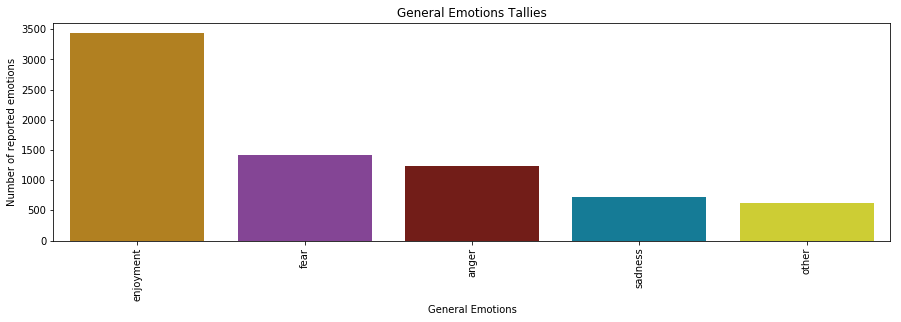

In [93]:
plt.figure(figsize=(15,4))
palette = {'enjoyment': '#c98709', 'fear': '#8c37a3', 'anger': '#810f09', 'sadness': '#0087ab', 'other': '#e6e71a'}
sns.countplot(x='generalEmotion', data=subset, orient='h', order = subset['generalEmotion'].value_counts().index, palette=palette)
plt.xticks(rotation='vertical')
plt.ylabel('Number of reported emotions')
plt.xlabel('General Emotions')
plt.title("General Emotions Tallies");

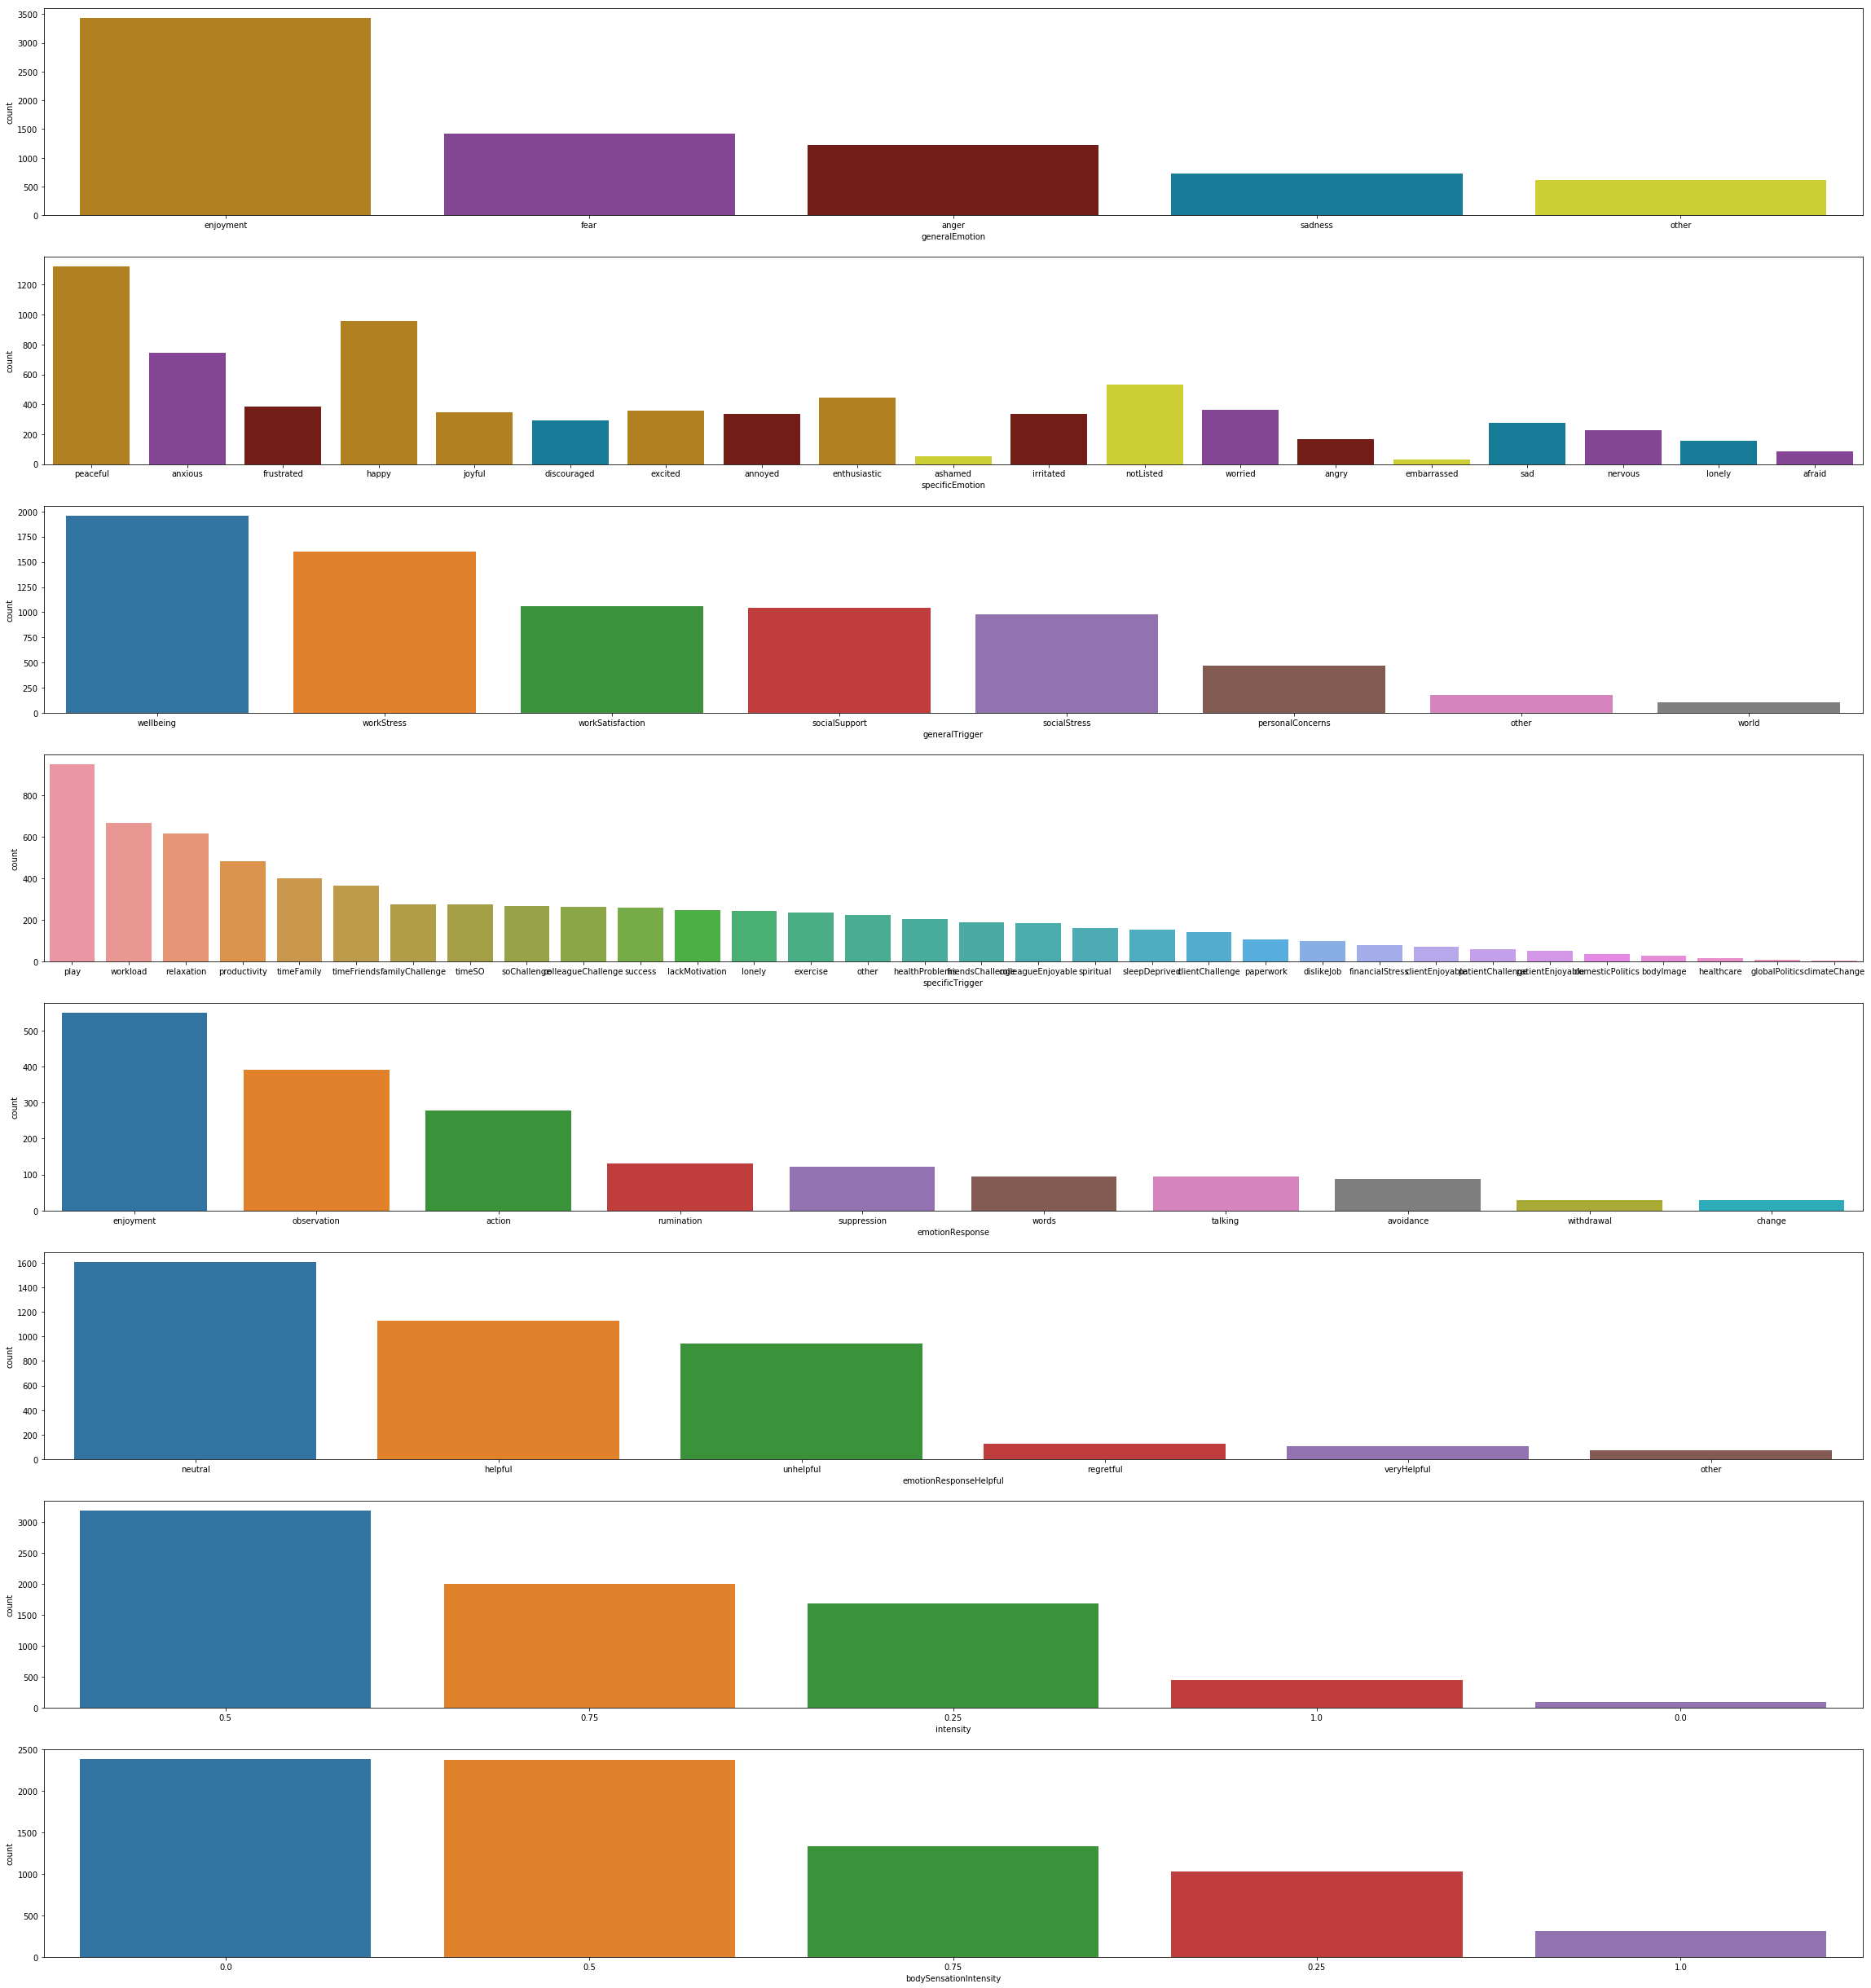

In [117]:
fig, axes = plt.subplots(8,1, figsize=(40,44))
sns.countplot(x='generalEmotion', data=subset, orient='h', order = subset['generalEmotion'].value_counts().index, palette=palette, ax=axes[0]);
# plt.xticks(rotation='vertical')
# plt.ylabel('Number of reported emotions')
# plt.xlabel('General Emotions')
# plt.title("General Emotions Tallies");
# palette = {'enjoyment': '#c98709', 'fear': '#8c37a3', 'anger': '#810f09', 'sadness': '#0087ab', 'other': '#e6e71a'}
sns.countplot(x='specificEmotion', data=subset, orient='h', palette=color, ax=axes[1]);
sns.countplot(x='generalTrigger', data=subset, orient='h', order = subset['generalTrigger'].value_counts().index, ax=axes[2]);
sns.countplot(x='specificTrigger', data=subset, orient='h', order = subset['specificTrigger'].value_counts().index, ax=axes[3]);
sns.countplot(x='emotionResponse', data=subset, orient='h', order = subset['emotionResponse'].value_counts().index, ax=axes[4]);
sns.countplot(x='emotionResponseHelpful', data=subset, orient='h', order = subset['emotionResponseHelpful'].value_counts().index, ax=axes[5]);
sns.countplot(x='intensity', data=subset, orient='h', order = subset['intensity'].value_counts().index, ax=axes[6]);
sns.countplot(x='bodySensationIntensity', data=subset, orient='h', order = subset['bodySensationIntensity'].value_counts().index, ax=axes[7]);

Text(0.5,1,'Emotion Intensity vs. Body Sensation Intensity')

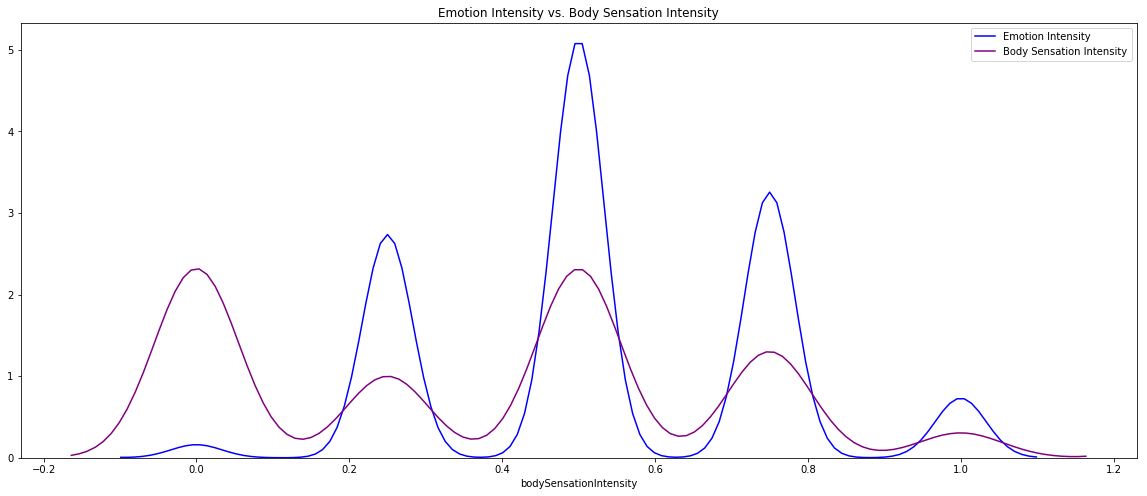

In [72]:
plt.figure(figsize=(20,8))
sns.distplot(subset['intensity'], hist=False, color='blue', label = 'Emotion Intensity');
sns.distplot(subset['bodySensationIntensity'], hist=False, color='purple', label = 'Body Sensation Intensity');
# plt.axvline(df[male]['LOAN_AMOUNT'].mean(), color="blue", linestyle="--")
# plt.axvline(df[female]['LOAN_AMOUNT'].mean(), color="purple", linestyle="--")
plt.legend();
plt.title('Emotion Intensity vs. Body Sensation Intensity')

In [ ]:
subset.groupby

In [91]:
subset.corr()

,intensity,bodySensationIntensity
intensity,1.00000,0.41522
bodySensationIntensity,0.41522,1.00000
